# Prediction of Cancer Death Rate

This file contains codes which builds an ML regression model that predicts cancer death rate in US. The provided features are evaluated using a number of ML regression algorithms to identify the best performing features, the best performing algorithm and the optimal prediction performance. We also analyze the impact of each feature in the model output. To achieve this, the following tasks are performed;
1. Importing of libraries and data file
2. Data profiling
3. Data cleaning and EDA
4. Feature correlation analysis
5. Feature encoding
6. Feature selection
7. Model evaluation
8. Hyperparameter tuning
9. Visualization of the model performance
10. Explaining the model and feature importance analysis

## Importing Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor,XGBRFRegressor 
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.impute import SimpleImputer
import time
import shap
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
#file = 'C:/Users/44744/Desktop/Notebooks/cancer_mortality_rate.csv'
file = 'C:/Users/tomna/Desktop/Notebooks/Datasets/cancer_mortality_rate.csv'
df = pd.read_csv(file, encoding="ISO-8859-1")

## Data Profiling

In [3]:
df.shape

(3047, 34)

In [4]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [5]:
# move the target column to the last position
new_cols = [col for col in df.columns if col != 'TARGET_deathRate'] + ['TARGET_deathRate']
df = df[new_cols]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   incidenceRate            3047 non-null   float64
 3   medIncome                3047 non-null   int64  
 4   popEst2015               3047 non-null   int64  
 5   povertyPercent           3047 non-null   float64
 6   studyPerCap              3047 non-null   float64
 7   binnedInc                3047 non-null   object 
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  Geography                3047 non-null   object 
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

There are 33 features in this dataset, 2 are classified as categorical while the rest are numerical. The dataset consists of 3047 records.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avgAnnCount,3047.0,606.338544,1416.356223,6.000000,76.000000,171.000000,518.000000,3.815000e+04
avgDeathsPerYear,3047.0,185.965868,504.134286,3.000000,28.000000,61.000000,149.000000,1.401000e+04
incidenceRate,3047.0,448.268586,54.560733,201.300000,420.300000,453.549422,480.850000,1.206900e+03
medIncome,3047.0,47063.281917,12040.090836,22640.000000,38882.500000,45207.000000,52492.000000,1.256350e+05
popEst2015,3047.0,102637.370528,329059.220504,827.000000,11684.000000,26643.000000,68671.000000,1.017029e+07
povertyPercent,3047.0,16.878175,6.409087,3.200000,12.150000,15.900000,20.400000,4.740000e+01
studyPerCap,3047.0,155.399415,529.628366,0.000000,0.000000,0.000000,83.650776,9.762309e+03
MedianAge,3047.0,45.272333,45.304480,22.300000,37.700000,41.000000,44.000000,6.240000e+02
MedianAgeMale,3047.0,39.570725,5.226017,22.400000,36.350000,39.600000,42.500000,6.470000e+01
MedianAgeFemale,3047.0,42.145323,5.292849,22.300000,39.100000,42.400000,45.300000,6.570000e+01


## Data Cleaning and EDA

In [8]:
# Identify numerical and categorical features
cols = df.columns.to_list()
numerical_cols = df.select_dtypes(include='number').columns.to_list()
categorical_cols = df.select_dtypes(exclude='number').columns.to_list()

In [9]:
print('---- List/number of unique values in each feature ----')
for col in cols:
    if df[col].nunique() <= 20:
        unique_values = sorted(list(df[col].unique()), reverse=False)
        print(col,': ', unique_values)
    else:
        number_unique_values = df[col].nunique()
        print(col,': ', number_unique_values) 

---- List/number of unique values in each feature ----
avgAnnCount :  929
avgDeathsPerYear :  608
incidenceRate :  1506
medIncome :  2920
popEst2015 :  2999
povertyPercent :  333
studyPerCap :  1117
binnedInc :  ['(34218.1, 37413.8]', '(37413.8, 40362.7]', '(40362.7, 42724.4]', '(42724.4, 45201]', '(45201, 48021.6]', '(48021.6, 51046.4]', '(51046.4, 54545.6]', '(54545.6, 61494.5]', '(61494.5, 125635]', '[22640, 34218.1]']
MedianAge :  325
MedianAgeMale :  298
MedianAgeFemale :  296
Geography :  3047
AvgHouseholdSize :  199
PercentMarried :  362
PctNoHS18_24 :  405
PctHS18_24 :  469
PctSomeCol18_24 :  343
PctBachDeg18_24 :  219
PctHS25_Over :  361
PctBachDeg25_Over :  281
PctEmployed16_Over :  409
PctUnemployed16_Over :  195
PctPrivateCoverage :  498
PctPrivateCoverageAlone :  459
PctEmpPrivCoverage :  450
PctPublicCoverage :  395
PctPublicCoverageAlone :  319
PctWhite :  3044
PctBlack :  2972
PctAsian :  2852
PctOtherRace :  2903
PctMarriedHouseholds :  3043
BirthRate :  3019
TARGET_de

The categorical feature 'Geography' has 3047 unique values out of 3047 records, that means each value has a count of 1. This is, therefore, an irrelevant feature and should be dropped.

In [10]:
# drop Geography feature
df.drop('Geography',axis = 1, inplace = True) 

Next we investigate negative values in each numerical feature which should be treated as missing values.

In [11]:
# Investigating negative values in each numerical feature
for col in numerical_cols :
    list_unique_value_col = df[col].unique()
    sublist_unique_value_col = [x for x in list_unique_value_col if x < 0]    # get values less than 0
    if sublist_unique_value_col:
        print(col, '-', sorted(sublist_unique_value_col, reverse=True)) 

None of the numerical features has negative values.

Next, we investigate missing values, irrelevant features and outliers and handle them accordingly.

<AxesSubplot:title={'center':'% of Missing Values in Columns'}>

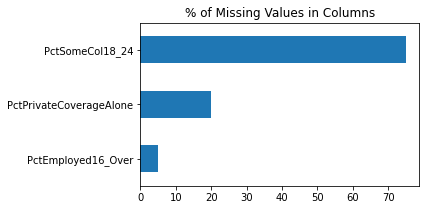

In [12]:
# Plot percentages of missing values for features with at least one missing value
df_null_cols = round((df.isnull().sum()/df.shape[0]*100), 1).sort_values(ascending=True) 
df_null_cols[df_null_cols > 0.0].plot.barh(figsize=(5,3), title='% of Missing Values in Columns', width=0.5) 

In [13]:
# Dropping all columns with at least 50% missing values
df_null_cols_del = df_null_cols[df_null_cols > 50.0]
cols_del = df_null_cols_del.index.to_list()   # return a list of columns to be deleted
df.drop(cols_del, axis = 1, inplace = True)  
print('Dropped features: ', cols_del)

Dropped features:  ['PctSomeCol18_24']


In [16]:
# imputing missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['PctPrivateCoverageAlone', 'PctEmployed16_Over']] = imputer.fit_transform(df[['PctPrivateCoverageAlone', 'PctEmployed16_Over']])
print('Missing values in the new dataset:')
df.isnull().sum()

Missing values in the new dataset:


avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
TARGET_deathRate           0
dtype: int64

In [211]:
# removing duplicates
original_rows = df.shape[0]
df.drop_duplicates(keep='first', inplace=True)
new_rows = df.shape[0]
print('Deleted number of duplicated rows: ', original_rows - new_rows)

Deleted number of duplicated rows:  0


In [212]:
# Investigating and removing irrelevant columns; those which have only one unique value
cols = df.columns.to_list()
# get fractions (%) of unique values for each column sorted by the largest
# if the fraction is 1, this means the column has only one unique value thus irrelevant for prediction
list_irrel_cols = []
for col in cols :
    counts_unique_values = round(df[col].value_counts(sort=True, normalize=True), 3)  # normalize creates a fraction of couts of each unique value in each column
    if counts_unique_values.iloc[0] == 1.0 :  # get the highest value for each column
        print(col)
        list_irrel_cols.append(col)
if list_irrel_cols :
    print('Irrelevant column(s) dropped: ', list_irrel_cols)
    df.drop([list_irrel_cols],axis = 1,inplace=True)  # drop column with one unique value only
else :
    print('No irrelevant columns were found!')

No irrelevant columns were found!


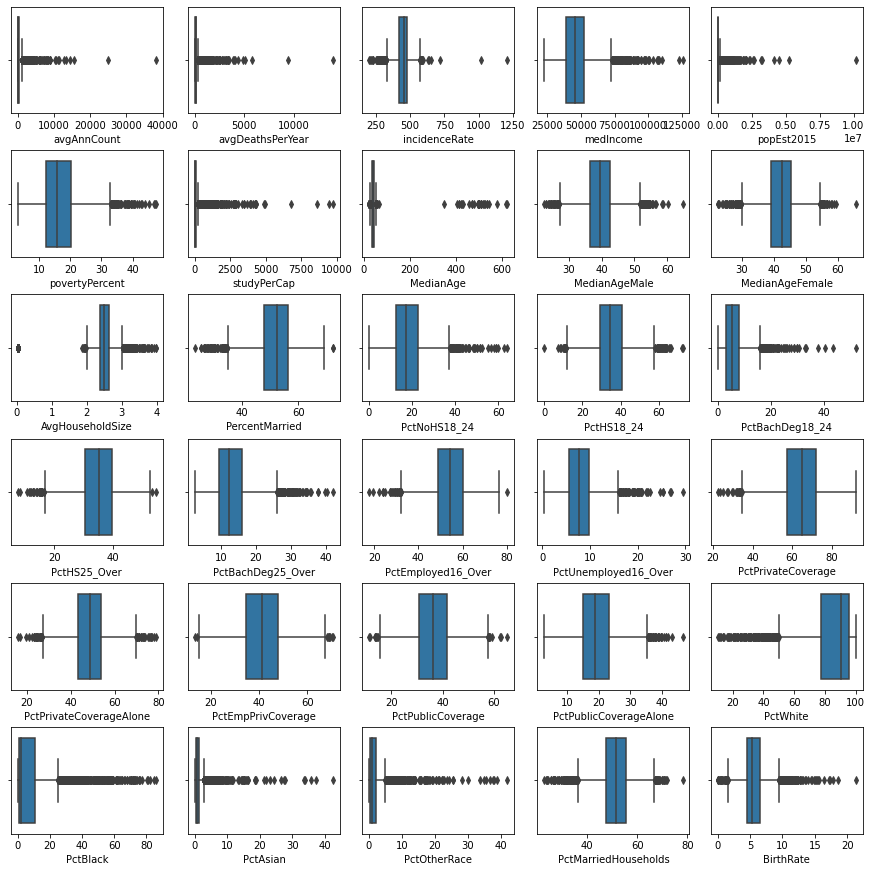

In [213]:
# Investigating outliers using plots
fig,axes = plt.subplots(6,5, figsize=(12,12), constrained_layout=True)  # numbers of rows and columns of the subplots depend on the number of categ columns
axes = axes.flatten()
numerical_cols = df.select_dtypes(include='number').columns.to_list() # updating the list of numerical columns after deleting one in the previous steps
del numerical_cols[-1]  # removing the target column
for col in numerical_cols :
    sns.boxplot(df[col], ax=axes[numerical_cols.index(col)])

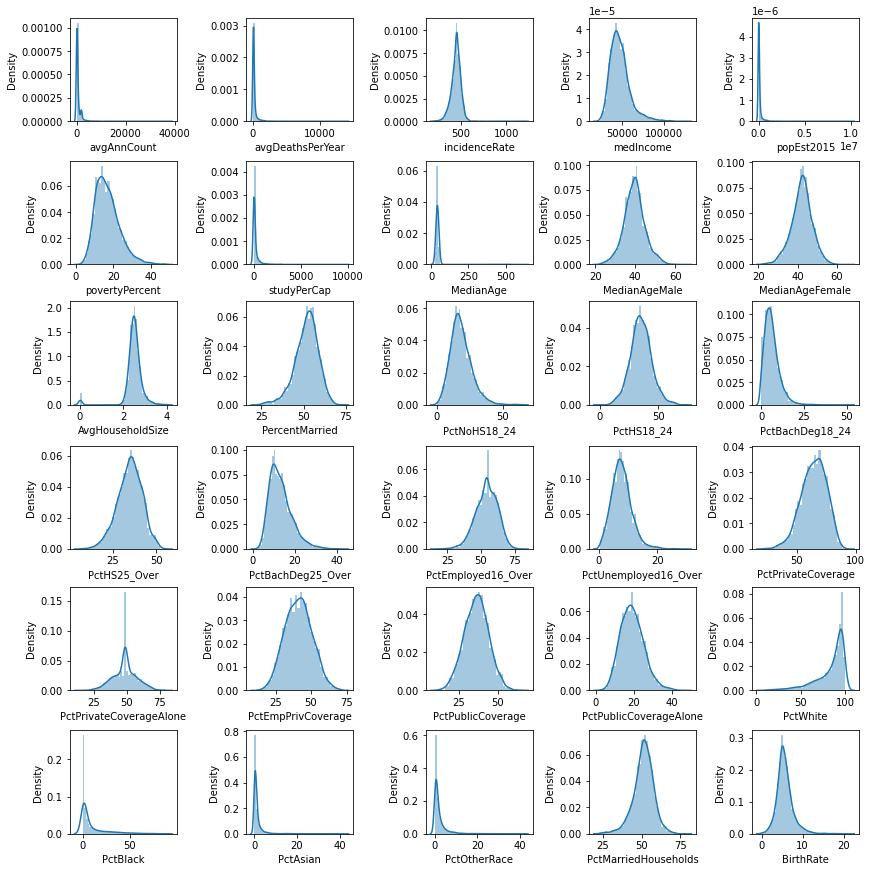

In [214]:
# another observation of outliers and data distribution using histogram and kde plots
fig,axes = plt.subplots(6,5, figsize=(12,12), constrained_layout=True)  # numbers of rows and columns of the subplots depend on the number of categ columns
axes = axes.flatten()
for col in numerical_cols :
    sns.distplot(df[col], ax=axes[numerical_cols.index(col)])

Outliers are observed in each numerical feature. Some of these are clearly errors for instance in 'MedianAge' where the median ages are up to 600. Next, we handle them by replacing them with low and upper whisker values as shown below. This approach is relevant given that the number of outliers is relatively a small percentage of records in their respective features as indicated below.

In [215]:
# identifying number and percentages of outliers for each feature and replacing them with lower and upper whisker values
col_outliers_list = []
for col in numerical_cols :
    q1 = df[col].quantile(0.25)                 
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - whisker_width*iqr
    upper_whisker = q3 + whisker_width*iqr
    col_outliers = df[col][(df[col] < lower_whisker) | (df[col] > upper_whisker)]
    df_col_outliers = pd.DataFrame({"Number_Outliers":len(col_outliers),"%_Outliers":round(len(col_outliers)/df.shape[0]*100,1)}, index=[col])
    col_outliers_list.append(df_col_outliers)
    # replacing outliers with lower and uper whisker values
    df[col].loc[df[col] < lower_whisker] = lower_whisker
    df[col].loc[df[col] > upper_whisker] = upper_whisker
df_outliers = pd.concat(col_outliers_list, axis=0)  # appending dataframes row-wise
df_outliers.sort_values(by='Number_Outliers', ascending=False)

,Number_Outliers,%_Outliers
studyPerCap,504,16.5
avgAnnCount,461,15.1
popEst2015,412,13.5
PctBlack,395,13.0
avgDeathsPerYear,349,11.5
PctAsian,323,10.6
PctOtherRace,297,9.7
AvgHouseholdSize,201,6.6
PctWhite,174,5.7
BirthRate,164,5.4


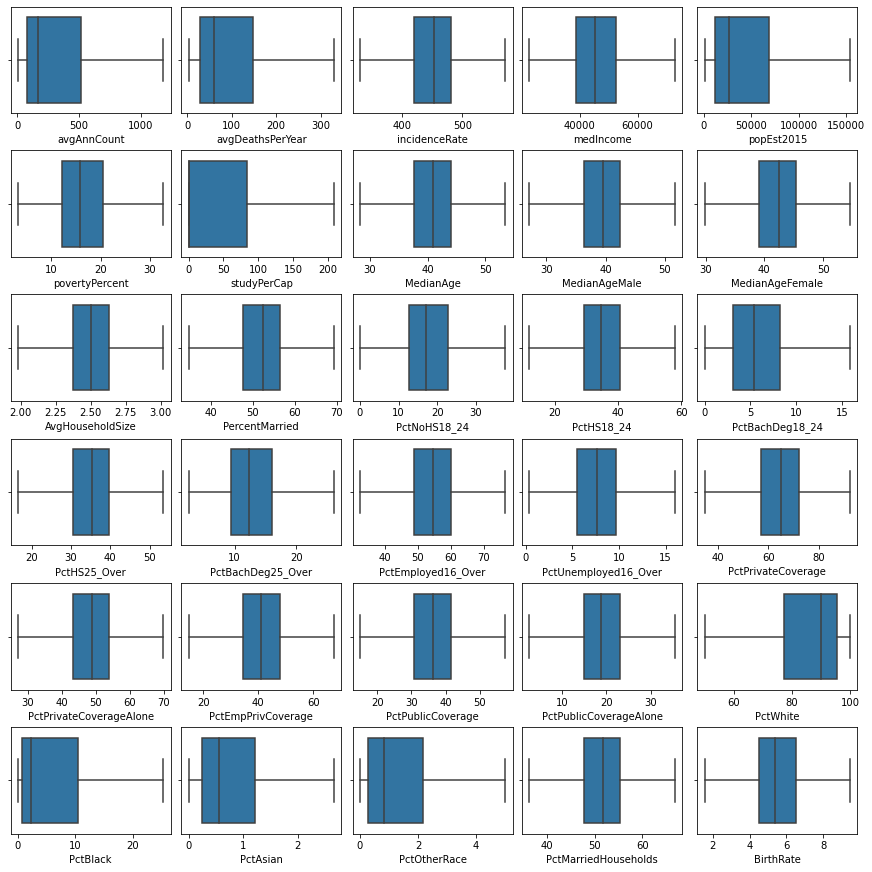

In [216]:
# viewing data distribution again after treating outliers
fig,axes = plt.subplots(6,5, figsize=(12,12), constrained_layout=True)  # numbers of rows and columns of the subplots depend on the number of categ columns
axes = axes.flatten()
for col in numerical_cols :
    sns.boxplot(df[col], ax=axes[numerical_cols.index(col)])

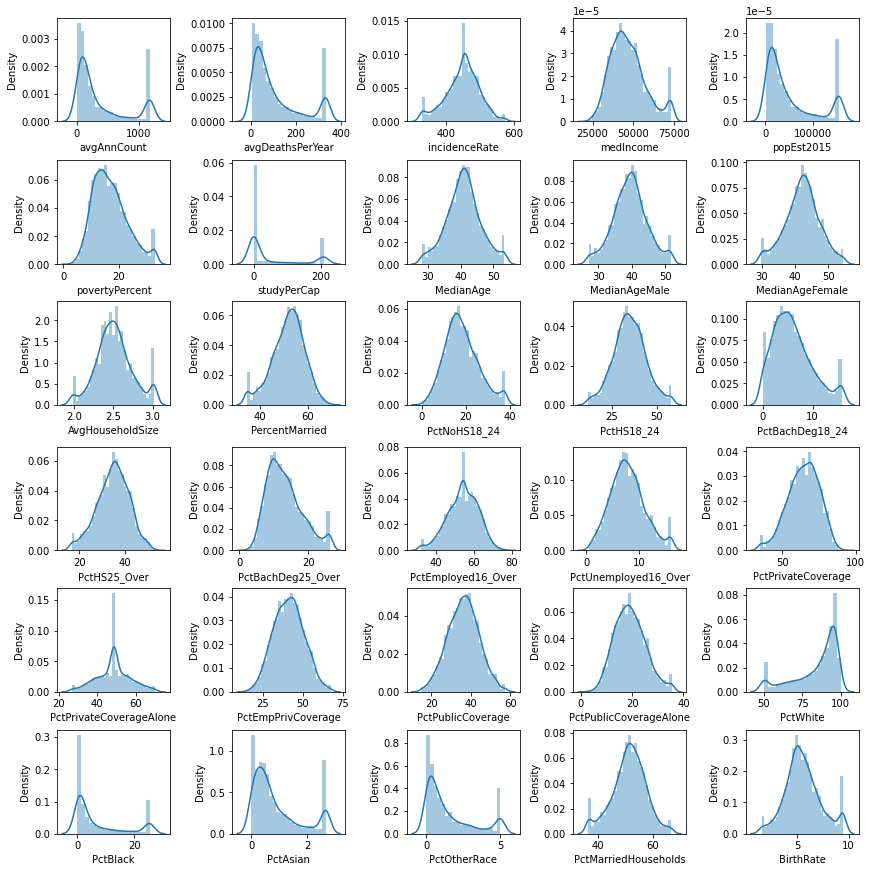

In [217]:
# another view of outliers and data distribution after halding outliers
fig,axes = plt.subplots(6,5, figsize=(12,12), constrained_layout=True)  # numbers of rows and columns of the subplots depend on the number of categ columns
axes = axes.flatten()
for col in numerical_cols :
    sns.distplot(df[col], ax=axes[numerical_cols.index(col)])

The above two plots shows that the outliers have been removed and data distribution in most columns have been improved towards normal distributions.

## Feature correlation analysis

Text(0.5, 1.0, 'Binned Income Correlation with Death Rate')

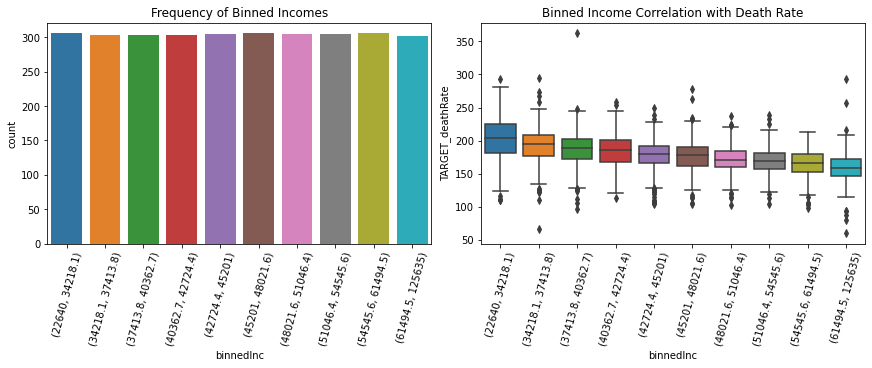

In [218]:
# Investigating data distribution of the categorical feature and the correlation against death rate
    # first, replacing [ and ] with ( and ) respectively for data uniformity in the 'binnedInc' feature
df['binnedInc'] = df['binnedInc'].str.replace('[','(')
df['binnedInc'] = df['binnedInc'].str.replace(']',')')
fig, axes = plt.subplots(1,2, figsize=(12,5),constrained_layout=True)
df = df.sort_values(by='binnedInc', ascending=True)
sns.countplot(ax=axes[0], data=df, x='binnedInc')
axes[0].tick_params('x', labelrotation=75)
axes[0].set_title('Frequency of Binned Incomes')
sns.boxplot(ax=axes[1], data=df, x='binnedInc', y='TARGET_deathRate')
axes[1].tick_params('x', labelrotation=75)
axes[1].set_title('Binned Income Correlation with Death Rate')

The number of samples of income brackets are equally distributed but the death rate is decreasing as the income bracket is increasing.

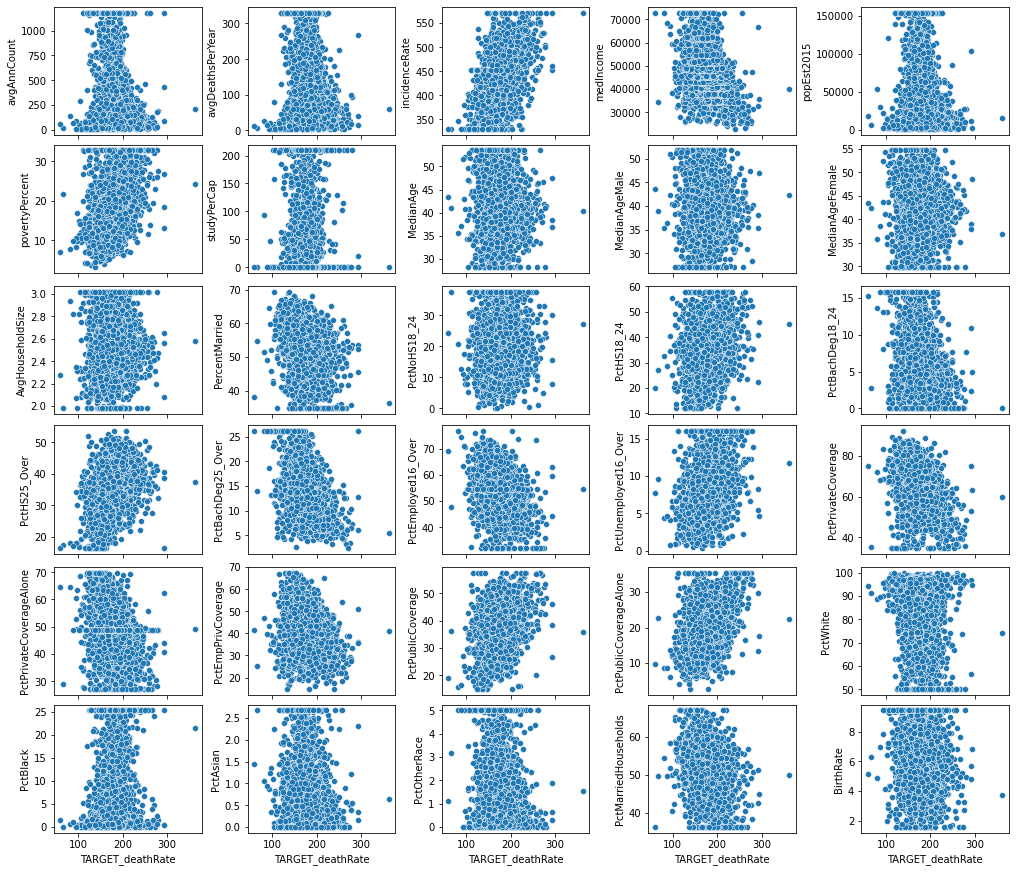

In [219]:
# Investigating correlations of numerical features against death rate
fig,axes = plt.subplots(6,5, figsize=(14,12), constrained_layout=True, sharex=True)  
axes = axes.flatten()
for col in numerical_cols :
    sns.scatterplot(x=df['TARGET_deathRate'], y=df[col], ax=axes[numerical_cols.index(col)])

In [220]:
# Pearson's Correlations of numerical features against the target variable
corr_matrix_target = abs(df.corr()['TARGET_deathRate']).sort_values(ascending=False)
round(corr_matrix_target,2)

TARGET_deathRate           1.00
PctBachDeg25_Over          0.48
PctPublicCoverageAlone     0.45
incidenceRate              0.45
medIncome                  0.44
povertyPercent             0.43
PctPublicCoverage          0.41
PctHS25_Over               0.40
PctEmployed16_Over         0.40
PctPrivateCoverage         0.39
PctUnemployed16_Over       0.38
PctPrivateCoverageAlone    0.33
PctBachDeg18_24            0.29
PctMarriedHouseholds       0.29
PctEmpPrivCoverage         0.27
PctHS18_24                 0.27
PercentMarried             0.26
PctBlack                   0.25
PctOtherRace               0.22
PctAsian                   0.21
avgAnnCount                0.18
PctWhite                   0.16
popEst2015                 0.13
PctNoHS18_24               0.10
studyPerCap                0.09
BirthRate                  0.07
avgDeathsPerYear           0.06
AvgHouseholdSize           0.02
MedianAgeMale              0.02
MedianAgeFemale            0.01
MedianAge                  0.00
Name: TA

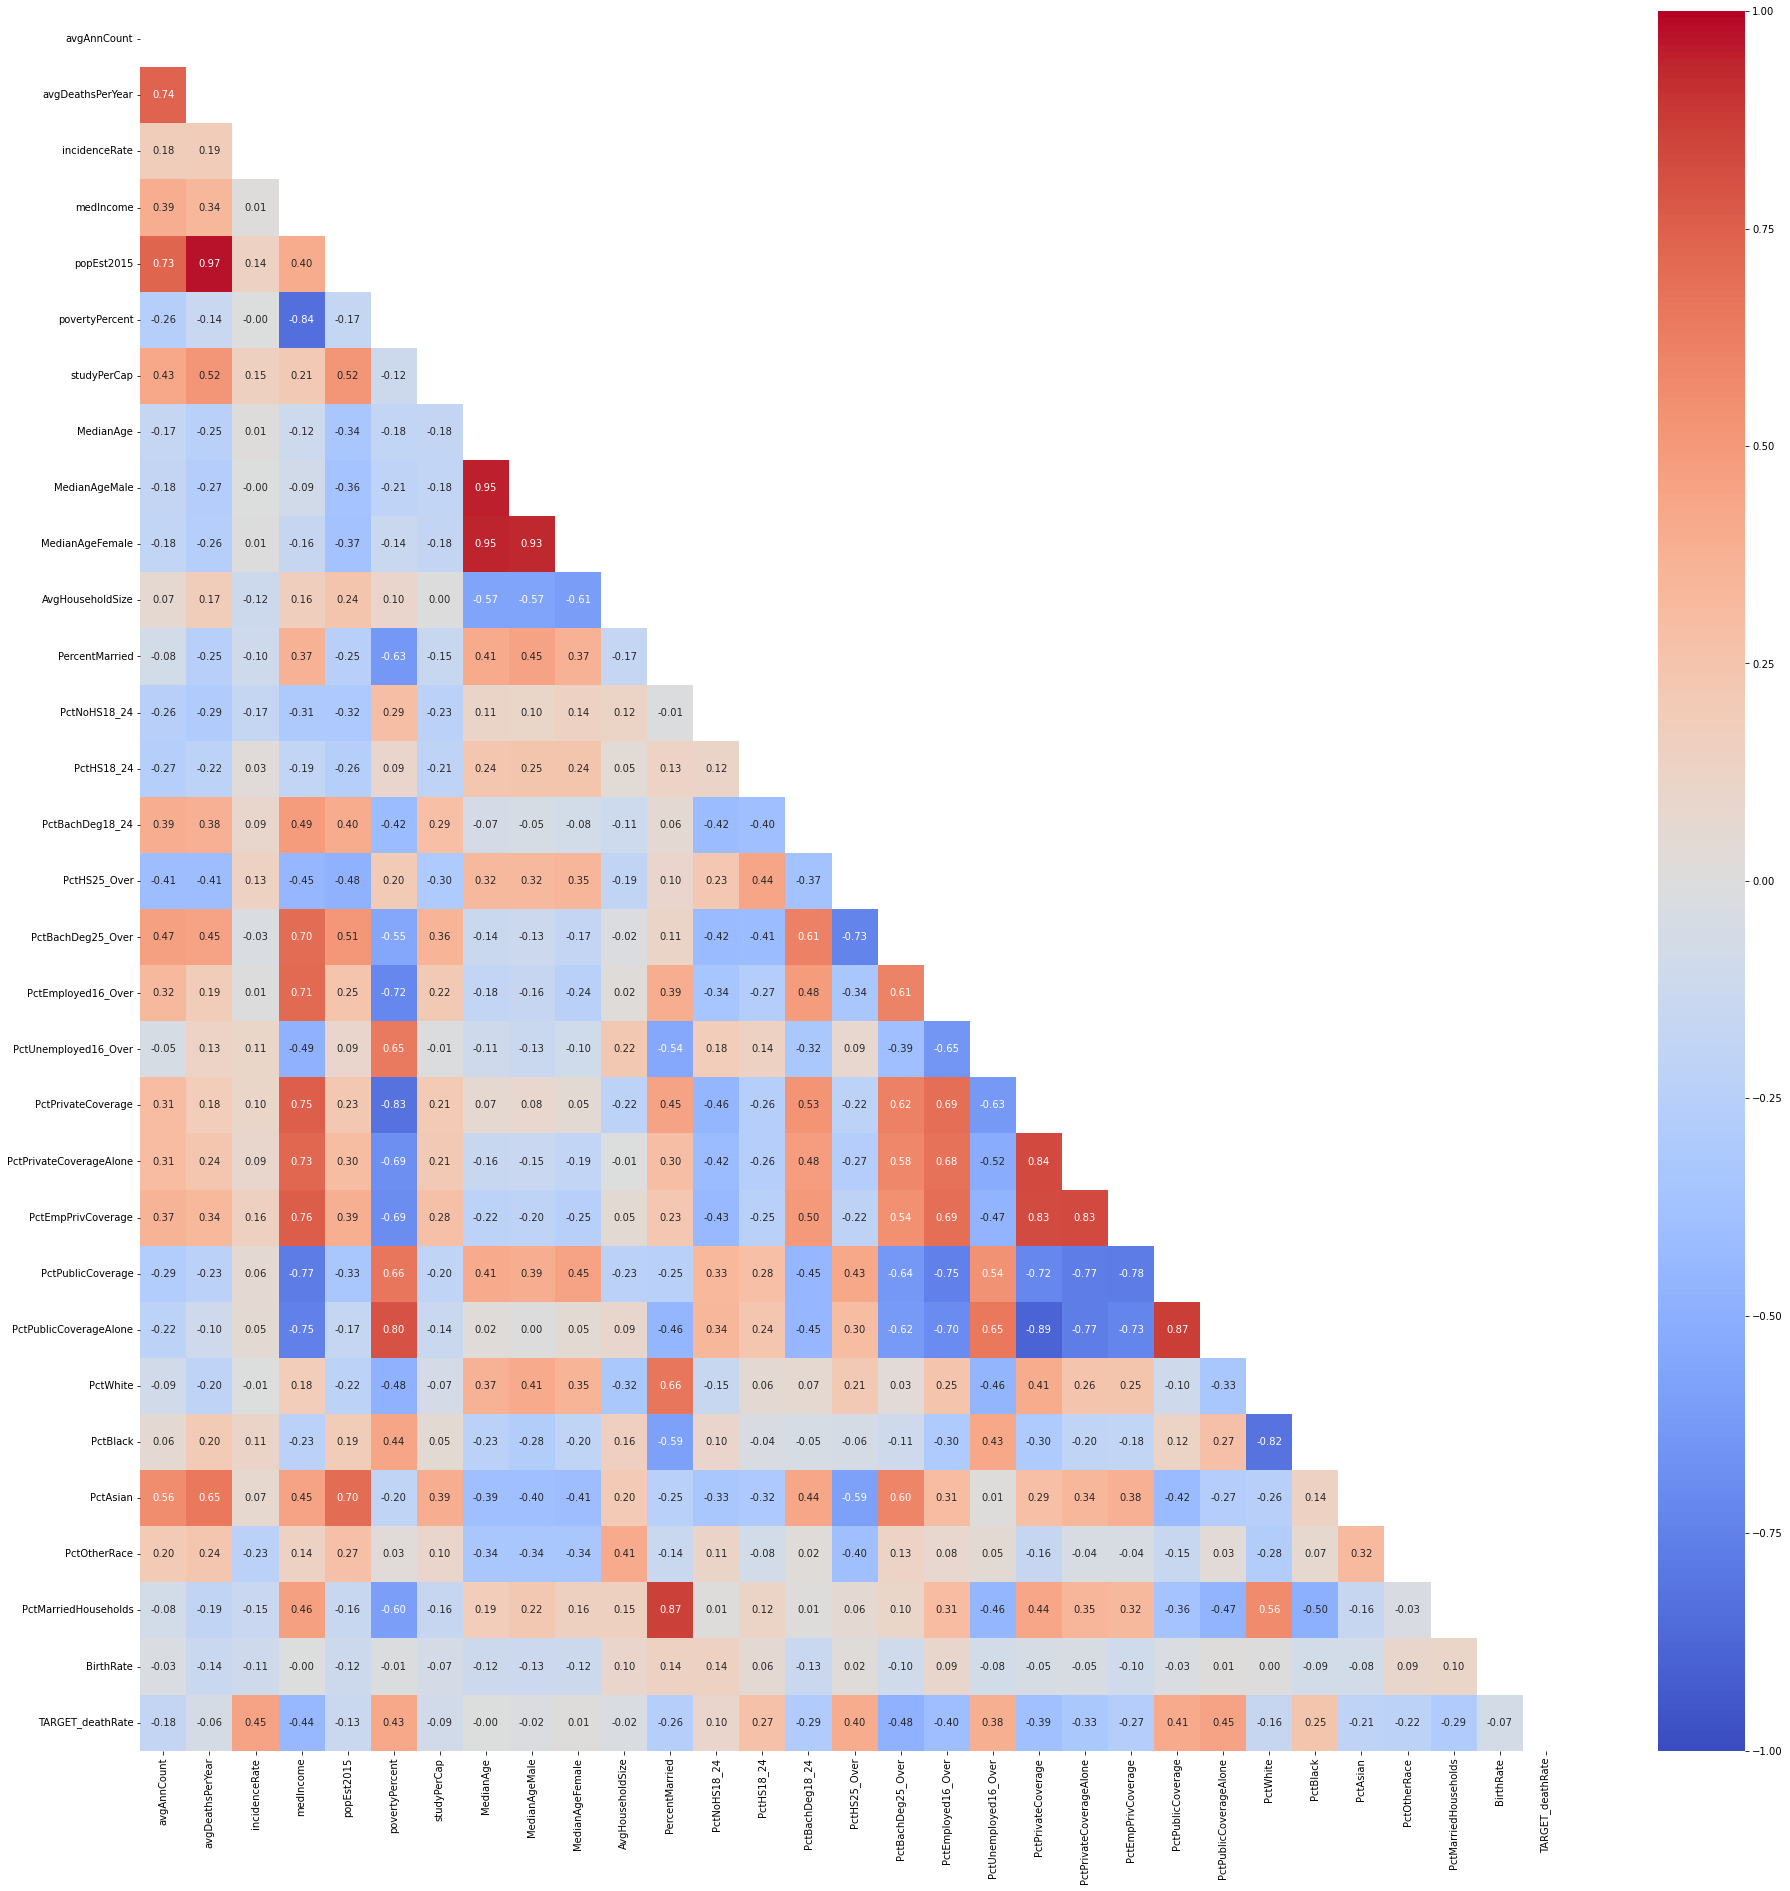

In [221]:
# Correlation matrix of numerical features 
plt.figure(figsize=(32,32))
corr_matrix = df.corr()
mask = np.triu(corr_matrix)  # remove diagonal values which are always 1 and the upper triangle which is a duplicate of the lower one
image = sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=mask) # annot=show numbers, fmt='.1f'= show 1 number of decimal places

Summary of the correlation analysis:
1. The scatter plot indicates that there are several moderate and weak correlations between some features and the death rate. Some of the former such as those relating to 'incidenceRate' and 'povertyPercent' are positively correlated with the target whereas other including 'PctEmployed16_Over' and 'PctPrivateCoverage' have negative correlation with the target.  A significant number of features including 'BirthRate' and 'avgDeathsPerYear' have very weak or zero correlation with the target. This result is also illustrated with the computed Pearson's correlation values between each numerical feature and the target as indicated in the Table and the last row of the heatmap.
2. The heatmap illustrates that features 'avgDeathsPerYear' is highly correlated with 'popEst2015'. Similarly, 'MedianAge' is highly correlated with 'MedianAgeMale' and 'MedianAgeFemale'. To retain only few but significant features for the prediction task, we  drop 'avgDeathsPerYear' and 'MedianAge' as they are also least correlated with the target compared to the other features.

In [222]:
df.drop(['avgDeathsPerYear','MedianAge'], axis=1, inplace=True)

## Feature Encoding
Here we have 'binnedInc' column as the only categorical column. The data in the column is ordered, thus it is an ordinal categorical feature. Since the binned values have different ranges, we replace them with numbers from 1 to 10 with 1 mapping the smallest range and 10 mapping the largest range. This is a simple form of ordinal encoding.

In [223]:
df['binnedInc'].value_counts().sort_index()

(22640, 34218.1)      306
(34218.1, 37413.8)    304
(37413.8, 40362.7)    304
(40362.7, 42724.4)    304
(42724.4, 45201)      305
(45201, 48021.6)      306
(48021.6, 51046.4)    305
(51046.4, 54545.6)    305
(54545.6, 61494.5)    306
(61494.5, 125635)     302
Name: binnedInc, dtype: int64

In [224]:
binnedInc_cat = {"binnedInc": {"(22640, 34218.1)": 1, "(34218.1, 37413.8)": 2, "(37413.8, 40362.7)": 3,
                                "(40362.7, 42724.4)": 4, "(42724.4, 45201)": 5, "(45201, 48021.6)": 6,
                                "(48021.6, 51046.4)": 7, "(51046.4, 54545.6)": 8,"(54545.6, 61494.5)": 9, 
                                "(61494.5, 125635)": 10 }}
df.replace(binnedInc_cat, inplace=True)
df['binnedInc'].value_counts().sort_index()

1     306
2     304
3     304
4     304
5     305
6     306
7     305
8     305
9     306
10    302
Name: binnedInc, dtype: int64

## Splitting Prediction and Target Variables
We split the dataset into prediction features and a target

In [225]:
df = shuffle(df)
X = df.drop(["TARGET_deathRate"], axis=1)
y = df["TARGET_deathRate"]
print('Number of Features before selection: ', len(X.columns.to_list()))

Number of Features before selection:  29


## Feature Selection
We use Recursive Feature Elimination (RFE) with cross validation to automatically identify the best predictive features

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
scaler = StandardScaler()  
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
kf = KFold(n_splits=3)
rfecv = RFECV(estimator=RandomForestRegressor(), step=1, min_features_to_select=3, cv=kf, scoring="neg_mean_squared_error", n_jobs=-1)  # for continuous output (regression problem), kfold is used rather than stratified ones becuase we do not have classes to ensure class equal distribution of samples across folds
rfecv.fit(X_train_scaled, y_train)
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])
for i in range(X.shape[1]):
    row = {'feature': X.columns[i], 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
df_features.sort_values(by='ranking')
df_features = df_features[df_features['support']==True]  # selected best features always give support value as True
best_features = df_features['feature'].to_list()  # get all values of the column
print("Number of features after feature selection : ", len(df_features['feature']))
print('Best features:', best_features)
X = df[best_features]

Number of features after feature selection :  15
Best features: ['incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPublicCoverageAlone', 'PctBlack', 'PctOtherRace']


## Model Evaluation
Various ML algorithms for regression tasks are used to evaluate the dataset in order to compare their performances and identify the best performing algorithms for the task. Here, we use KFold cross validation technique to split dataset into 10 folds in which we train and evaluate the algorithms in each fold separately to obtain the mean scores. Three performance metrics are used to report and compare the algorithms.

In [227]:
models = []
models_results_list = []
models.append(('LinearRegression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('SVR', SVR(kernel='linear')))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
estimators = [('LR', LinearRegression()), ('SVR',SVR(kernel='linear'))]
models.append(('StackingRegressor', StackingRegressor(estimators=estimators,
                    final_estimator=RandomForestRegressor(n_estimators=100,random_state=42))))
models.append(('BaggingRegressor', BaggingRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('AdaBoostRegressor', AdaBoostRegressor()))
models.append(('LGBMRegressor', LGBMRegressor()))
models.append(('CatBoostRegressor', CatBoostRegressor(logging_level='Silent')))
models.append(('XGBRegressor', XGBRegressor()))
models.append(('XGBRFRegressor', XGBRFRegressor()))
kf = KFold(n_splits=10)
for name, model in models:
    MSEs = []
    MAEs = []
    RMSEs = []
    R2 = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        R2.append(r2_score(y_test, y_pred))
        MAEs.append(mean_absolute_error(y_test, y_pred))
        MSE = mean_squared_error(y_test, y_pred)
        MSEs.append(MSE)
        RMSEs.append(np.sqrt(MSE))
    R2_mean = round(np.mean(R2), 2)
    MAE_mean = round(np.mean(MAEs), 2)
    MSE_mean = round(np.mean(MSEs), 2)
    RMSE_mean = round(np.mean(RMSEs), 2)
    df_model_results = pd.DataFrame({"R2":R2_mean, "MAE":MAE_mean, "RMSE":RMSE_mean}, index=[name])
    models_results_list.append(df_model_results)
df_results = pd.concat(models_results_list, axis=0)  # appending dataframes row-wise
df_results.sort_values(['R2','MAE','RMSE'], ascending=[False,True,True])

,R2,MAE,RMSE
CatBoostRegressor,0.55,13.84,18.66
ExtraTreesRegressor,0.54,13.81,18.74
RandomForestRegressor,0.53,13.95,18.95
LGBMRegressor,0.53,14.02,18.92
GradientBoostingRegressor,0.53,14.04,19.04
XGBRFRegressor,0.51,14.41,19.44
SVR,0.50,14.56,19.67
LinearRegression,0.50,14.60,19.63
Ridge,0.50,14.60,19.63
Lasso,0.49,14.77,19.80


The results shows that CatboostRegressor has the highest R squared and the least MAE and RMSE compared with the other algorithms. We therefore conclude that the algorithm suits the best for learning this dataset. Next, we tune the algorithm in an attempt to further optimizes it.

## Hyperparameter tuning

In [228]:
# We first print default hyperparameters
CBR = CatBoostRegressor(logging_level='Silent')
CBR.fit(X,y)
params = CBR.get_all_params()
print(params)

{'nan_mode': 'Min', 'eval_metric': 'RMSE', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'eval_fraction': 0, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': True, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'RMSE', 'learning_rate': 0.0488240011036396, 'score_function': 'Cosine', 'task_type': 'CPU', 'leaf_

In [229]:
time_start = time.time()
params = {'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06,0.07],
          'iterations': [400,600,800,1000,1200,1400,1600,1800],'depth': [3,4,5,6,7,8,9,10,12],'l2_leaf_reg': [1,3,5,7,9,12]
            }
CBR = CatBoostRegressor(logging_level='Silent')
kf = KFold(n_splits=3) 
# grid = RandomizedSearchCV(estimator=CBR, param_distributions=params, n_iter=100, cv=kf,scoring='neg_root_mean_squared_error',
#                           random_state=8, verbose=0, n_jobs=-1)
grid = GridSearchCV(estimator=CBR, param_grid=params, cv=kf, scoring='neg_root_mean_squared_error', verbose=0, n_jobs=-1)
grid.fit(X_train, y_train)
print('Best Parameters:', grid.best_params_)
model = grid.best_estimator_   # get the best model
y_pred = model.predict(X_test)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print('Optimal R2 :', round(R2,2), ' | MAE :', round(MAE,2), ' | RMSE :', round(RMSE,2))
time_end = time.time()
execTime = time_end - time_start 
print('Tuning Time :' , round(execTime/3600,2), ' hrs')

Best Parameters: {'depth': 8, 'iterations': 600, 'l2_leaf_reg': 3, 'learning_rate': 0.03}
Optimal R2 : 0.56  | MAE : 13.41  | RMSE : 17.56
Tuning Time : 51.11  hrs


## Visualizing the model's performance

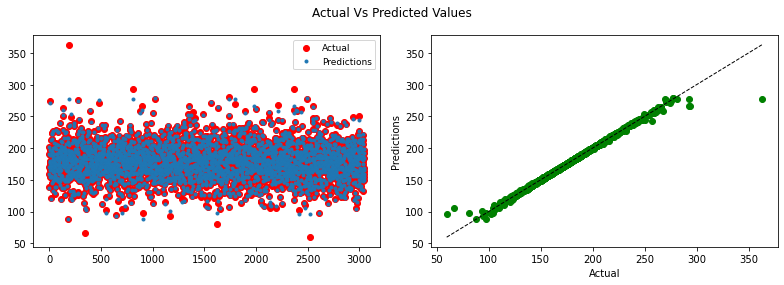

In [230]:
y_pred = cross_val_predict(CBR, df, y, cv=5)
plt.subplots(figsize=(11,4))
plt.subplot(1,2,1)
df = df.sort_values(by=['TARGET_deathRate'])
plt.scatter(range(X.shape[0]), y, color='red', label='Actuals')
plt.scatter(range(X.shape[0]), y_pred, marker='.', label='Predictions')
plt.legend(loc='best', prop={'size': 9})

plt.subplot(1,2,2)
plt.scatter(y, y_pred, color='green',)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.suptitle("Actual Vs Predicted Values")
plt.tight_layout()
plt.show()

The two plots show actual death rate values mapped against the predicted ones generated by the model. Clearly, the model has performed well in most predictions. There are few predictions errors that can be observed in both plots.

## Explaining the model and feature importance ranking
Here we use a SHAP library to understand how the features influence the model's prediction task. To do so, we compute shap values of each sample for each feature to explain how each feature, for each sample, positively or negatively impact the model. This also rank the overall importance of the features on the prediction.

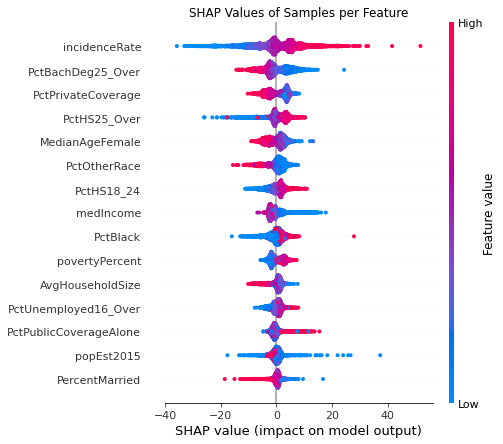

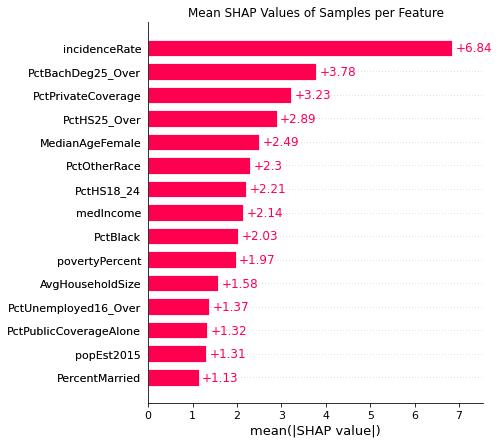

In [231]:
# analysis of feature impact on the prediction using SHAP values
model = CBR.fit(X_train, y_train)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)
# beeswarm plot
shap.plots.beeswarm(shap_values, max_display=len(X_train), show=False)
plt.title("SHAP Values of Samples per Feature")
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.gcf().set_size_inches(6,7)
plt.show()
print('\n')
# bar plot
shap.plots.bar(shap_values, max_display=len(X_train), show=False)
plt.title("Mean SHAP Values of Samples per Feature")
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.gcf().set_size_inches(6,7)
plt.show()

Based on the shap values of each feature on each sample and the mean shap values per feature, the plots show that 'incidenceRate' is the most infuential feature in the prediction task whereas 'PercentMarried' is the least one. It can be observed from the first plot that low values of 'incidenceRate' negatively impact the model whereas high values positively impact the model. This is opposite to 'PercentMarried' where low and high values impact the model in positive and negative directions respectively.